## Companies selection

In [1]:
# IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import datetime

**Selecting companies to study**

From our `news_data` we can see what companies are mentioned and in how many articles. We of course would like to study those companies that are mentioned most often so we have more data to perform our sentiment analysis on. Nevertheless our `stock_data` also will condition this choice, as we want to select companies with the highest market cap possible so the finance data is most granular (e.g. every few minutes there is a stock value point) and people are most likely interested in it. Therefore we now find those companies that are most often mentioned in the `news_data` and also have the highest market cap. 


In [2]:
# READ DATA SETS

    # FINANTIAL NEWS
news = pd.read_csv(r"Data/us_equities_news_dataset.csv")

    # TOP 7106 COMPANIES BY MARKET CAP
market = pd.read_csv(r"Data/companiesmarketcap.com - Companies ranked by Market Cap - CompaniesMarketCap.com.csv")

In [17]:
# FIND MOST FREQUENTLY MENTIONED TICKERS
tickers = news['ticker'].value_counts()
tick_mc = market[['Rank','Symbol','marketcap']]
tick_an = pd.DataFrame({'Symbol':list(tickers.index),'Article_n':list(tickers)})
tick_mc_an = tick_mc.merge(tick_an, on = 'Symbol').head(n=20).sort_values(by= 'Article_n', ascending= False)
tick_mc_an.reset_index().head(n = 20)


,index,Rank,Symbol,marketcap,Article_n
0,0,1,AAPL,2245746491392,20231
1,1,3,MSFT,1791532859392,8110
2,16,25,BAC,296829911040,7409
3,2,5,AMZN,942841135104,6330
4,3,7,TSLA,562562130000,4283
5,6,10,XOM,455235764224,2831
6,9,14,JPM,400557768704,2600
7,19,32,KO,270195392512,1367
8,8,12,WMT,415197298688,1267
9,11,17,CVX,350046846976,1105


The density of articles per month for a given company is another important criteria for both choosing companies and also deciding what time period to study. The following code explores the `news_data` and plots the number of articles published for a given company per month. 

0     AAPL
1     MSFT
16     BAC
2     AMZN
3     TSLA
6      XOM
9      JPM
19      KO
8      WMT
Name: Symbol, dtype: object


/tmp/ipykernel_38038/3141698495.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['month'] = [date[:7]+'-01' for date in list(company_data['release_date'])]
/tmp/ipykernel_38038/3141698495.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['month'] = [date[:7]+'-01' for date in list(company_data['release_date'])]
/tmp/ipykernel_38038/3141698495.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

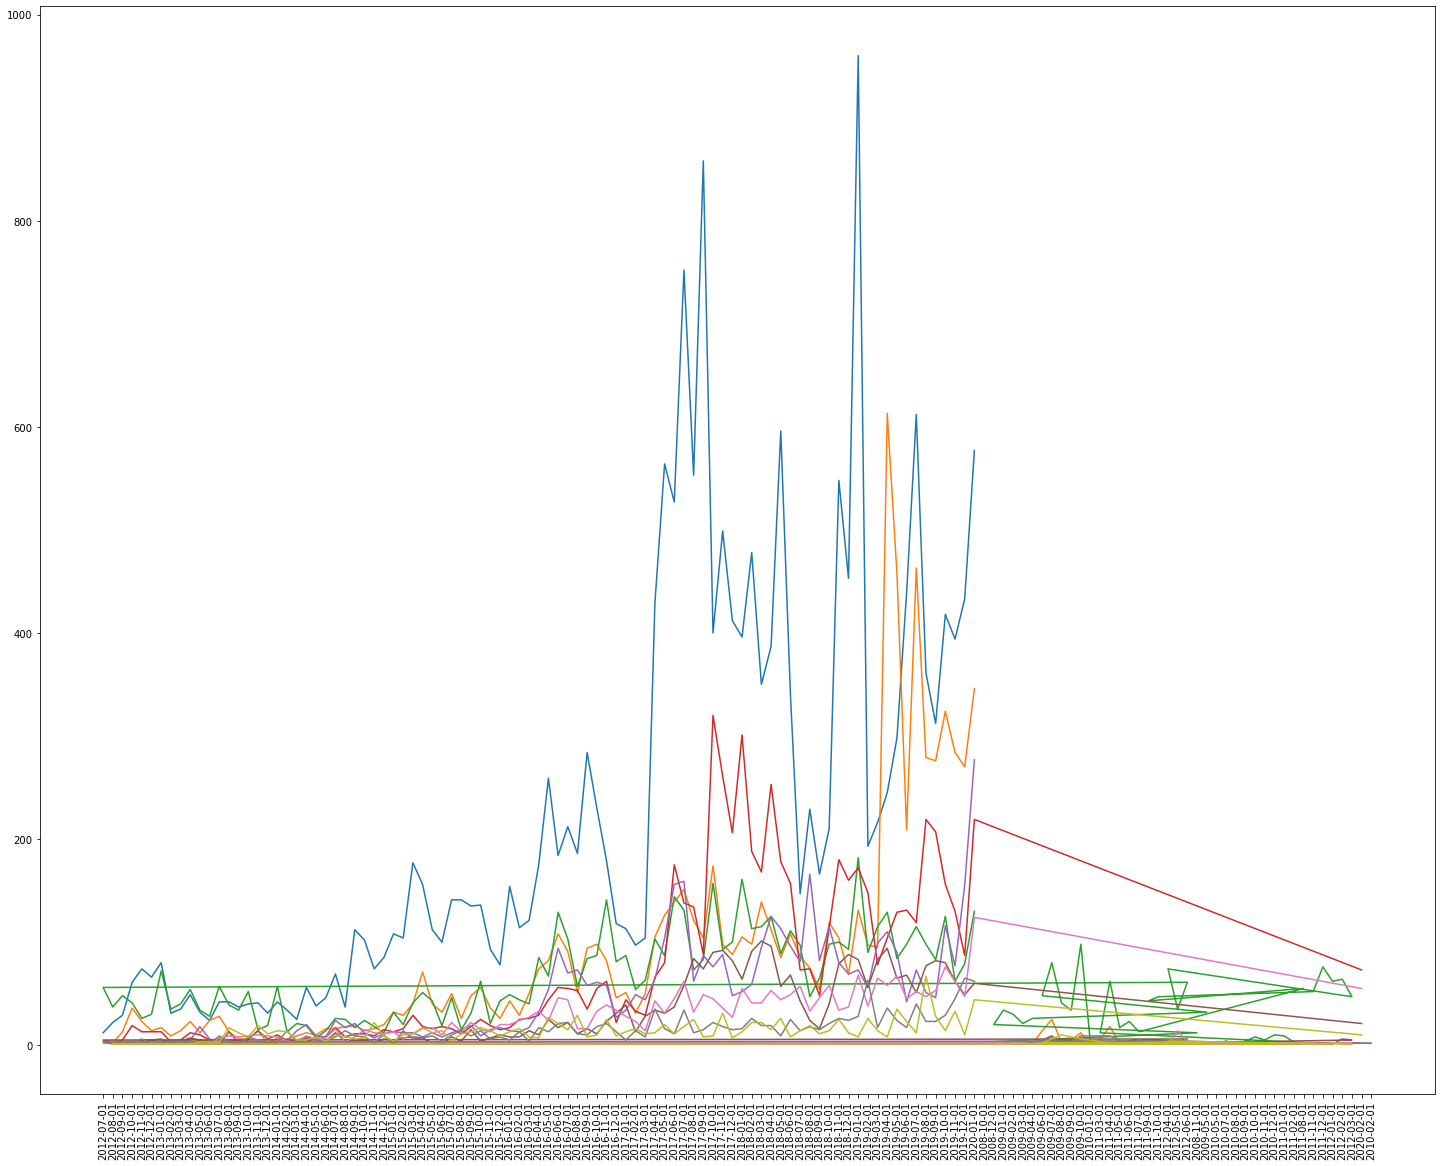

In [23]:
# LOOKING AT TIME SPAN FOR EACH COMPANY TO AID WITH SELECTION

tickers = tick_mc_an["Symbol"].iloc[0:9]
print(tickers)
plt.figure(figsize = (25,20))
for company_ticker in tickers:

        # MAKING COLUMN WITH SIMPLY MONTH
    company_data = news[news['ticker'] == company_ticker]
    company_data['month'] = [date[:7]+'-01' for date in list(company_data['release_date'])]

        # COUNTING OCCURANCES OF EACH MONTH
    date_counts = pd.DataFrame({'Date': company_data.value_counts('month').index, 'Count': company_data.value_counts('month').values})
    date_counts = date_counts.sort_values('Date')

    plt.plot(date_counts['Date'],date_counts['Count'])
    plt.xticks(rotation = 90)

plt.show()
